In [ ]:
import torch
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import pickle
from torch.utils.data import Dataset
from torch import nn
from tqdm.auto import tqdm
from typing import Dict, List, Tuple
import cv2
import torchvision

In [ ]:
file_train = open('/content/drive/MyDrive/Colab Notebooks/data/train.pickle', 'rb')
file_valid = open('/content/drive/MyDrive/Colab Notebooks/data/valid.pickle', 'rb')
file_test = open('/content/drive/MyDrive/Colab Notebooks/data/test.pickle', 'rb')
labels_name=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/label_names.csv')


data_dict_train = pickle.load(file_train)
data_dict_valid = pickle.load(file_valid)
data_dict_test = pickle.load(file_test)

x_train=data_dict_train['features']
x_train=np.transpose(x_train, (0,3, 2, 1))
y_train=data_dict_train['labels']

x_valid=data_dict_valid['features']
x_valid=np.transpose(x_valid, (0,3, 2, 1))
y_valid=data_dict_valid['labels']

x_test=data_dict_test['features']
x_test=np.transpose(x_test, (0,3, 2, 1))
y_test=data_dict_test['labels']


# put all the class labels name string in a list

classes=labels_name.values
classes=classes[:,1:]
classes=classes.tolist()
classes = [''.join(arr) for arr in classes]

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x_train, y_train , transform=None):
        self.x_train = x_train
        self.y_train = y_train
        self.transform = transform
    def __len__(self):
        return len(self.x_train)
    
    def __getitem__(self, idx):
        feature = self.x_train[idx]
        label = self.y_train[idx]
        feature=torch.tensor(feature,dtype=torch.float)
        labels=torch.tensor(label,dtype=torch.long)
        if self.transform:
            feature = self.transform(feature)
        return feature, labels

In [ ]:

NUM_WORKERS = os.cpu_count()


def rgb_loader(x_train,y_train,x_valid,y_valid,x_test,y_test ,transform=None ):

  train_dataset = CustomDataset(x_train,y_train , transform)
  valid_dataset = CustomDataset(x_valid,y_valid,transform)
  teset_dataset = CustomDataset(x_test,y_test,transform)

  train_dataloader = DataLoader(train_dataset ,batch_size=32, shuffle=True,num_workers=NUM_WORKERS, pin_memory=True,)
  valid_dataloader=DataLoader(valid_dataset ,batch_size=32, shuffle=True,num_workers=NUM_WORKERS, pin_memory=True,)
  test_dataloader=DataLoader(teset_dataset ,batch_size=16, shuffle=False,num_workers=NUM_WORKERS, pin_memory=True,)     

  return train_dataloader , valid_dataloader , test_dataloader





In [ ]:
# call the loaders
train_dataloader , valid_dataloader , test_dataloader=rgb_loader(x_train,y_train,x_valid,y_valid,x_test,y_test)


In [ ]:
class CustomCNN1(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()
        self.name = "Shallow Model"




        self.conv_block_1 = nn.Sequential(
            


            nn.Conv2d(in_channels=input_shape, 
                      out_channels=64, 
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),



            nn.Conv2d(in_channels=64, 
                      out_channels=64,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )








        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*16*16,
                      out_features=output_shape),
        )







    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        
        return x


      print(CustomCNN1)

IndentationError: ignored

In [ ]:
class CustomCNN2(nn.Module):
    def __init__(self, input_shape: int,  output_shape: int):
        super().__init__()
        self.name = "Shallow Model"

        self.conv_block_1 = nn.Sequential(         
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=32, 
                      kernel_size=3,
                      padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),

            nn.Conv2d(in_channels=32, 
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout2d(0.3)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, 
                      out_channels=64, 
                      kernel_size=3, 
                      padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),


            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout2d(0.3)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=64*8*8, out_features=128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(in_features=128, out_features=output_shape)
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)

        return x

In [ ]:
class CustomCNN3(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()



        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),


            nn.Conv2d(in_channels=32,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),


            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.25)
        )






        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),

            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )





        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )





        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )






        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=256*2*2, out_features=512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=512, out_features=1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=1024, out_features=output_shape),
        )






    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.conv_block_4(x)
        x = self.classifier(x)
        return x

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    model.train()

    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc








def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    model.eval()

    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc









def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
               }
    model.to(device)

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(
            f"Epoch: {epoch + 1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

def calculate_performance(
        model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        device: torch.device,
        class_names: List[str],
        title: str) -> Tuple[float, float, float]:
    model.eval()

    y_pred = []
    y_true = []
    test_acc = 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            output = (torch.max(torch.exp(test_pred_logits), 1)[1]).data.cpu().numpy()
            y_pred.extend(output)

            labels = y.data.cpu().numpy()
            y_true.extend(labels)

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_acc = test_acc / len(dataloader)
    cf_matrix = confusion_matrix(y_true, y_pred, normalize='true')
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    df_cm = pd.DataFrame(cf_matrix, index=[i for i in class_names],
                         columns=[i for i in class_names])
    plt.figure(figsize=(40, 30))
    plt.title(title)
    sns.heatmap(df_cm, annot=True)
    plt.show()

    return test_acc, f1, precision, recall








def plot_loss_curves(results, title):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(12, 4))
    plt.suptitle(title, fontsize=15)

     # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()    

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#train diffrent model on rgb picture


torch.manual_seed(42)
torch.cuda.manual_seed(42)

simple_cnn = CustomCNN1(input_shape=3, output_shape=43).to(device)
#simple_cnn = CustomCNN2(input_shape=3, output_shape=43).to(device)
#simple_cnn = CustomCNN3(input_shape=3, output_shape=43).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=simple_cnn.parameters(), lr=0.0001)

results_simple_cnn = train(
    simple_cnn,
    valid_dataloader,
    test_dataloader,
   optimizer, 
    loss_fn,
    epochs=10,
    device=device)

In [ ]:
plot_loss_curves(results_simple_cnn, title="custom1")
#plot_loss_curves(results_simple_cnn, title="custom2")
#plot_loss_curves(results_simple_cnn, title="custom3")


acc, f1, precision, recall = calculate_performance(simple_cnn, test_dataloader, device, classes, "custom1")
#acc, f1, precision, recall = calculate_performance(simple_cnn, test_dataloader, device, classes, "custom2")                                                  
#acc, f1, precision, recall = calculate_performance(simple_cnn, test_dataloader, device, classes, "custom3")                                                 

print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")

# this section is for part 4 of exercise we compare to image of 2 class "Right_of_way_at_the_next_intersection" and "Pedestrians" that based on confusion matrix are missclasified


In [ ]:



y=y_train=data_dict_train['labels']
x=data_dict_train['features']



index_of_Right_of_way_at_the_next_intersection = []
for i in range(len(y)):
    if y[i] == 11:
        index_of_Right_of_way_at_the_next_intersection.append(i)
print(index_of_Right_of_way_at_the_next_intersection)

index_of_Pedestrians = []
for i in range(len(y)):
    if y[i] == 27:
        index_of_Pedestrians.append(i)
print(index_of_Pedestrians)

[8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8588, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8601, 8602, 8603, 8604, 8605, 8606, 8607, 8608, 8609, 8610, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8625, 8626, 8627, 8628, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642, 8643, 8644, 8645, 8646, 8647, 8648, 8649, 8650, 8651, 8652, 8653, 8654, 8655, 8656, 8657, 8658, 8659, 8660, 8661, 8662, 8663, 8664, 8665, 8666, 8667, 8668, 8669, 8670, 8671, 8672, 8673, 8674, 8675, 8676, 8677, 8678, 8679, 8680, 8681, 8682, 8683, 8684, 8685, 8686, 8687, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8696, 8697, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8722, 8723, 8724, 8725, 8726, 8727, 8728, 8729, 8730, 8731, 8732, 8733, 8734, 8735, 8736, 8737, 8738, 8739, 8740, 8741, 8742, 8743, 8744, 8745, 874

In [ ]:
# in this section you need to delete the  x_train=np.transpose(x_train, (0,3, 2, 1))  in the first cell to show the right image
x=np.reshape(x_train[8603], (32,32,3))
plt.imshow(x)
plt.show()


x=np.reshape(x_train[10374], (32,32,3))
plt.imshow(x)
plt.show()



#in this section we use trnasfer learning

# resnet model

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

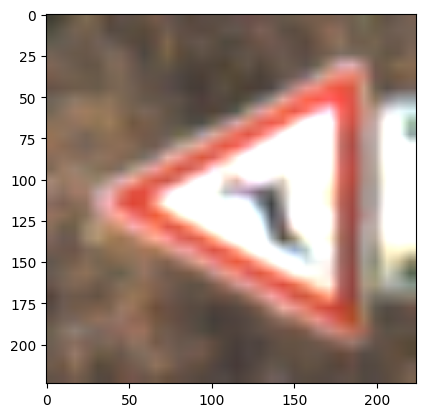

In [ ]:
# in this section we use trnasfer learning

# data preproccesing

from torchvision import transforms
from PIL import Image



preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataloader , valid_dataloader , test_dataloader=rgb_loader(x_train,y_train,x_valid,y_valid,x_test,y_test,transform=preprocess)



#visulize them with transform 
for batch_idx, (feature, labels) in enumerate(train_dataloader):
    break
plt.imshow(feature[5].permute(1, 2, 0).float()/224)
plt.show()


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 1 | train_loss: 2.3372 | train_acc: 0.4944 | test_loss: 2.5470 | test_acc: 0.3363


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 2 | train_loss: 1.0899 | train_acc: 0.8374 | test_loss: 2.3109 | test_acc: 0.3815


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 3 | train_loss: 0.6898 | train_acc: 0.9148 | test_loss: 2.2550 | test_acc: 0.3928


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 4 | train_loss: 0.4998 | train_acc: 0.9422 | test_loss: 2.2230 | test_acc: 0.4015


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 5 | train_loss: 0.3796 | train_acc: 0.9642 | test_loss: 2.2161 | test_acc: 0.4123


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 6 | train_loss: 0.3066 | train_acc: 0.9685 | test_loss: 2.2034 | test_acc: 0.4167


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 7 | train_loss: 0.2651 | train_acc: 0.9775 | test_loss: 2.2438 | test_acc: 0.4187


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 8 | train_loss: 0.2274 | train_acc: 0.9782 | test_loss: 2.2087 | test_acc: 0.4225


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 9 | train_loss: 0.1991 | train_acc: 0.9805 | test_loss: 2.1987 | test_acc: 0.4299


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 10 | train_loss: 0.1708 | train_acc: 0.9880 | test_loss: 2.2262 | test_acc: 0.4304


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

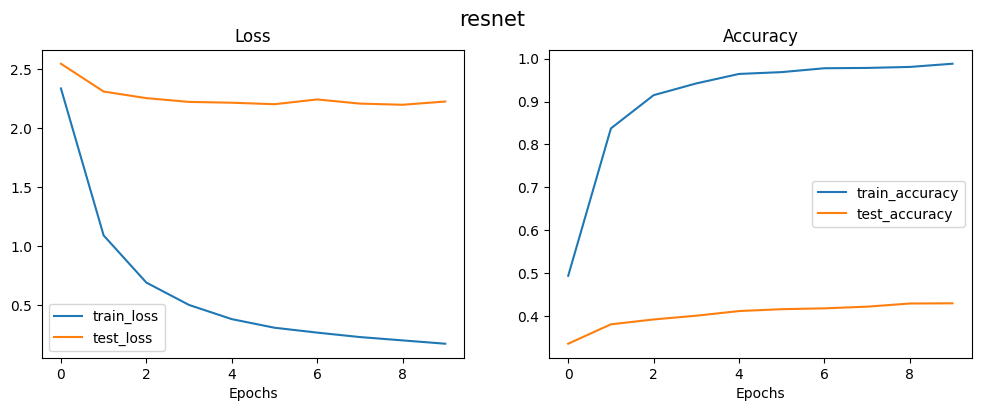

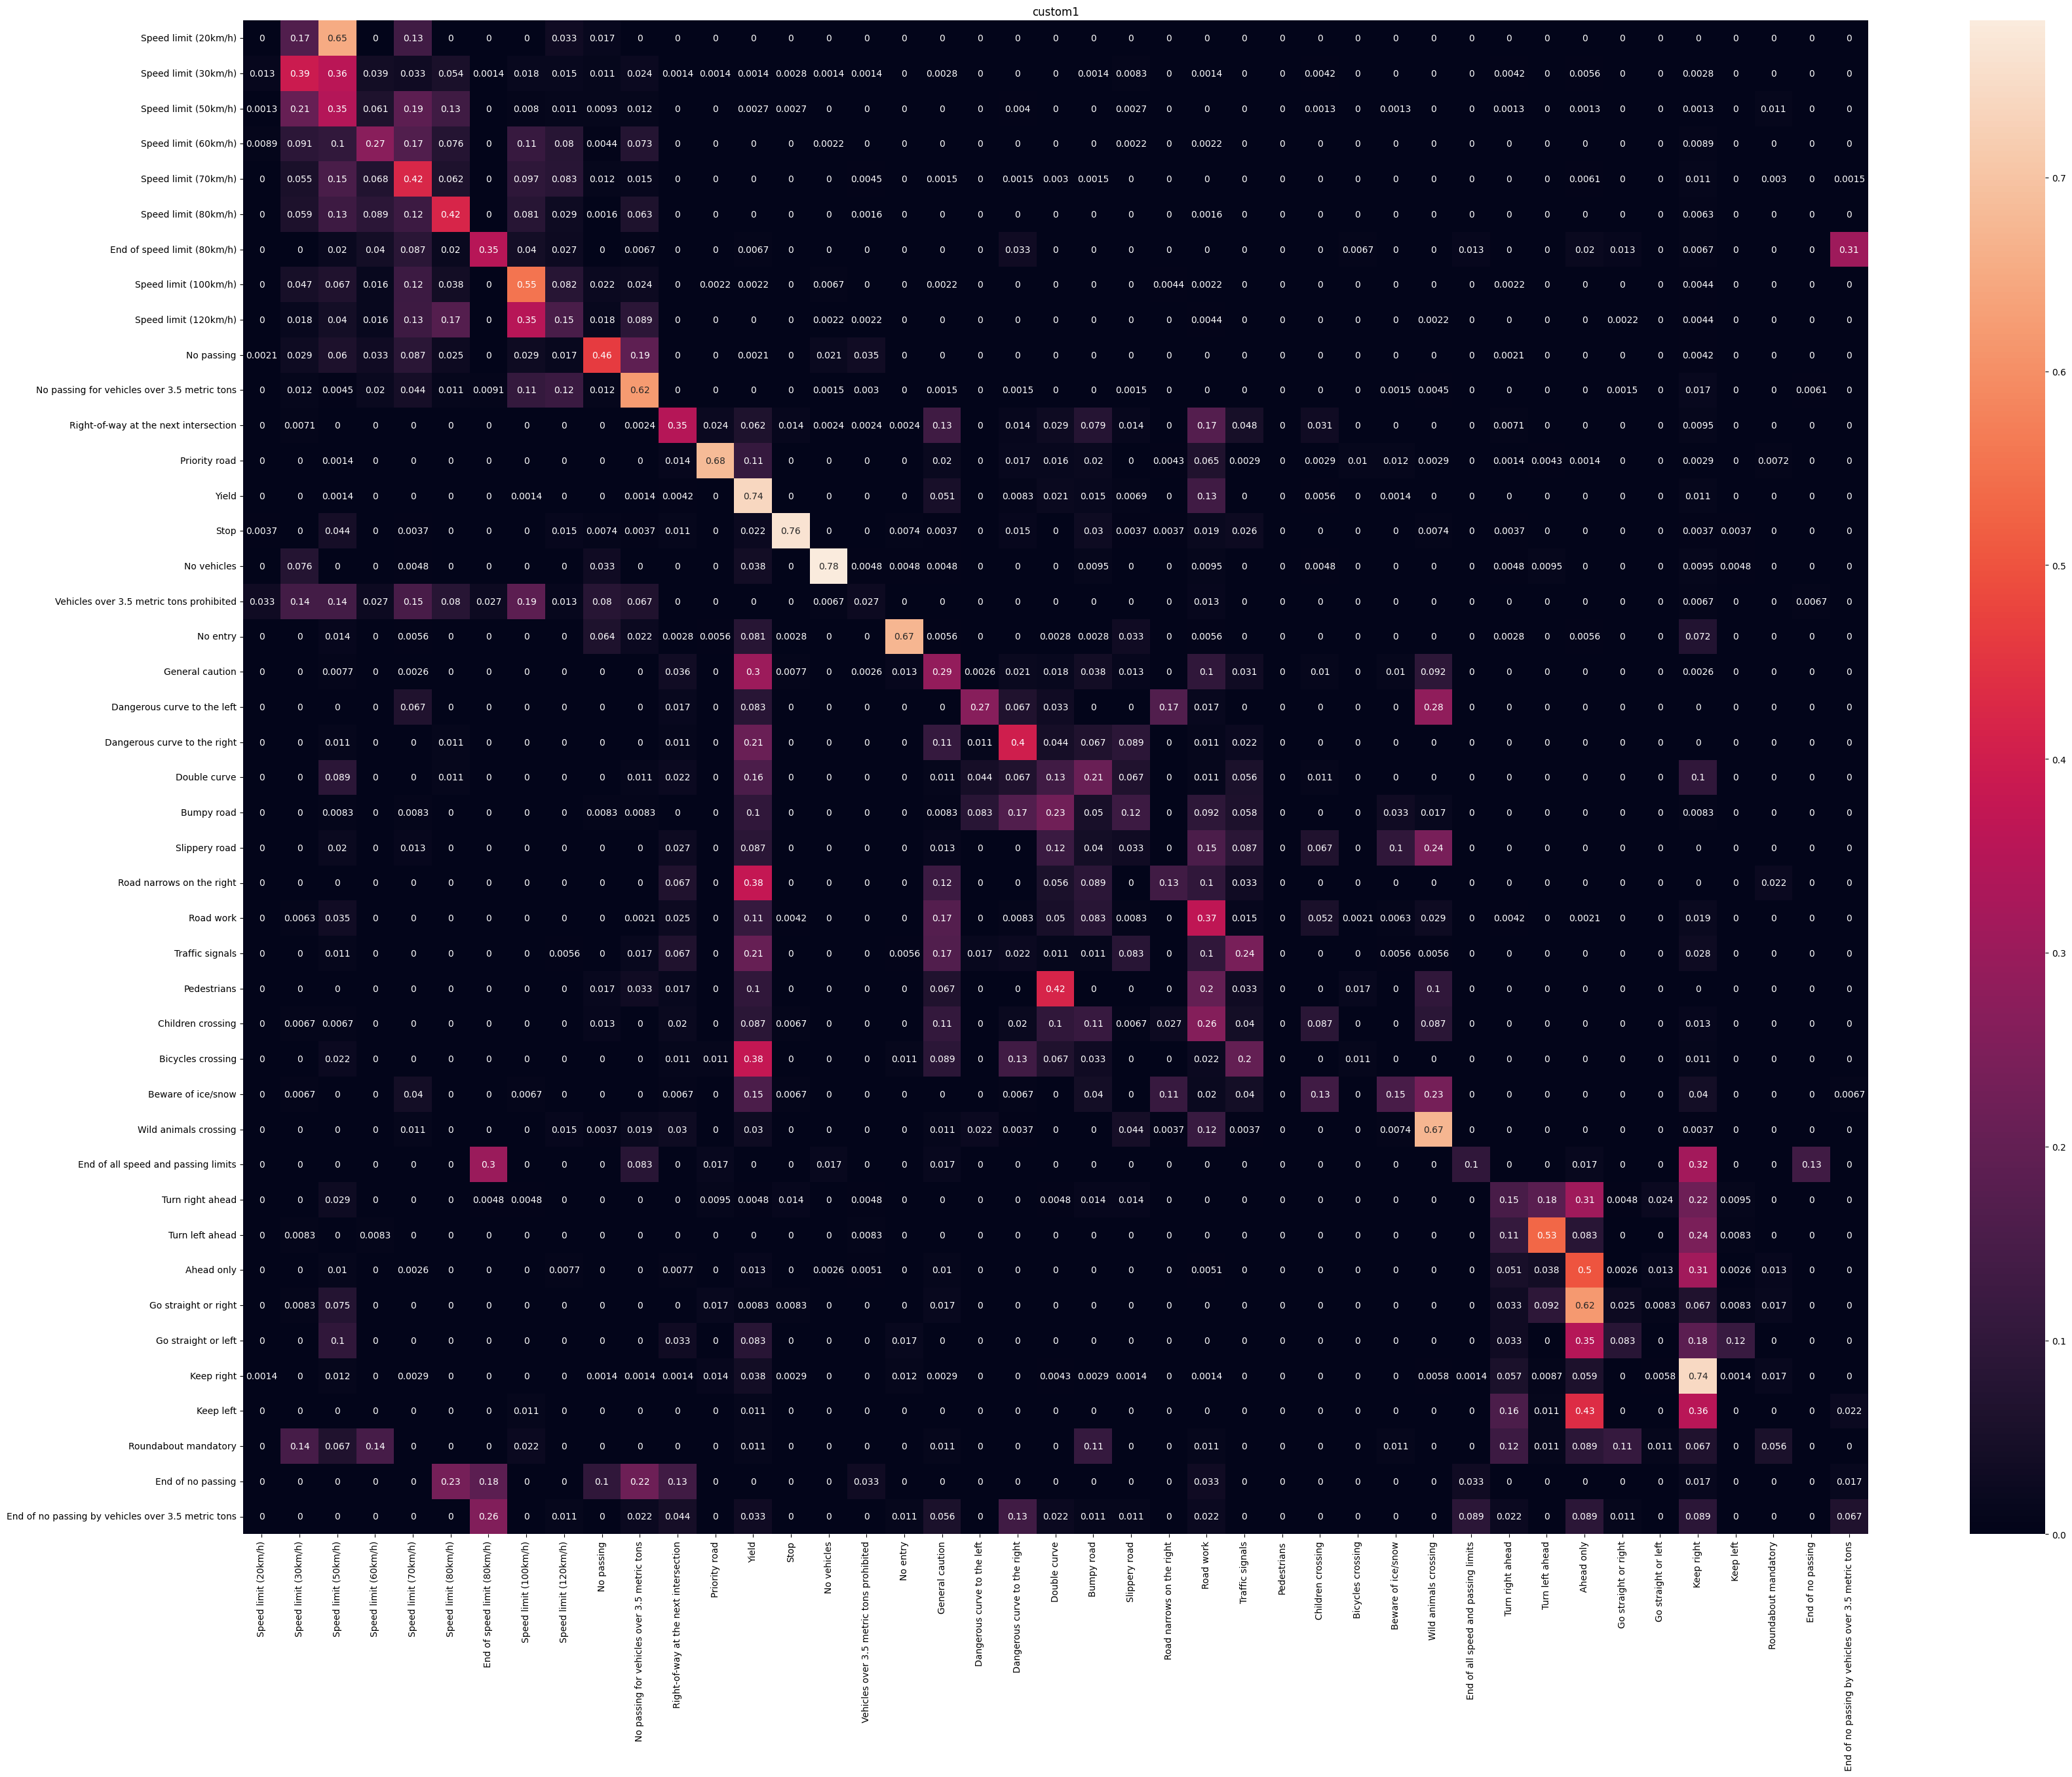

Accuracy = 0.43037974683544306, f1 score = 0.30353937127537794, precision = 0.3271488340796032, recall = 0.3025465556052007


In [ ]:

#prepare resnet model and train


weights = torchvision.models.ResNet50_Weights.DEFAULT
model_resnet = torchvision.models.resnet50(weights=weights).to(device)

for param in model_resnet.parameters():
    param.requires_grad = False
model_resnet.fc.requires_grad = True

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_resnet.fc = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=2048, 
                    out_features=43, 
                    bias=True)).to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.fc.parameters(), lr=0.001)



torch.manual_seed(42)
torch.cuda.manual_seed(42)
results_resnet = train(model=model_resnet,
                       train_dataloader=valid_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

plot_loss_curves(results_resnet, title="resnet")
acc, f1, precision, recall = calculate_performance(model_resnet, test_dataloader, device, classes, "custom1")
                                          
print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")


# alex net

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

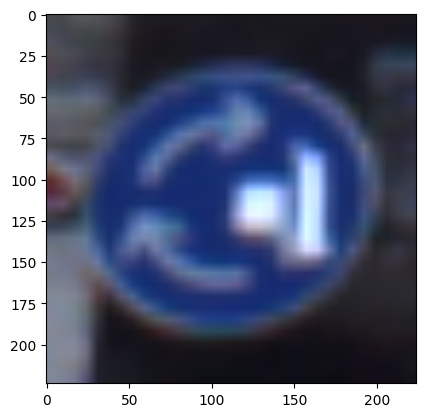

In [ ]:






transform = torchvision.transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


train_dataloader , valid_dataloader , test_dataloader=rgb_loader(x_train,y_train,x_valid,y_valid,x_test,y_test,transform=preprocess)
for batch_idx, (feature, labels) in enumerate(train_dataloader):
    break
plt.imshow(feature[5].permute(1, 2, 0).float()/224)
plt.show()


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 1 | train_loss: 22.0637 | train_acc: 0.0539 | test_loss: 12.2574 | test_acc: 0.1182


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 2 | train_loss: 15.3193 | train_acc: 0.1066 | test_loss: 11.4735 | test_acc: 0.1429


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 3 | train_loss: 13.3968 | train_acc: 0.1348 | test_loss: 11.0174 | test_acc: 0.1715


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 4 | train_loss: 11.8586 | train_acc: 0.1556 | test_loss: 9.8134 | test_acc: 0.1826


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 5 | train_loss: 10.8516 | train_acc: 0.1779 | test_loss: 10.1216 | test_acc: 0.1967


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 6 | train_loss: 10.3839 | train_acc: 0.1973 | test_loss: 9.5425 | test_acc: 0.2071


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 7 | train_loss: 9.6922 | train_acc: 0.2128 | test_loss: 9.6080 | test_acc: 0.1959


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 8 | train_loss: 9.1825 | train_acc: 0.2214 | test_loss: 9.5809 | test_acc: 0.2097


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 9 | train_loss: 8.7373 | train_acc: 0.2363 | test_loss: 8.9915 | test_acc: 0.2049


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 10 | train_loss: 8.2290 | train_acc: 0.2404 | test_loss: 8.9679 | test_acc: 0.2178


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

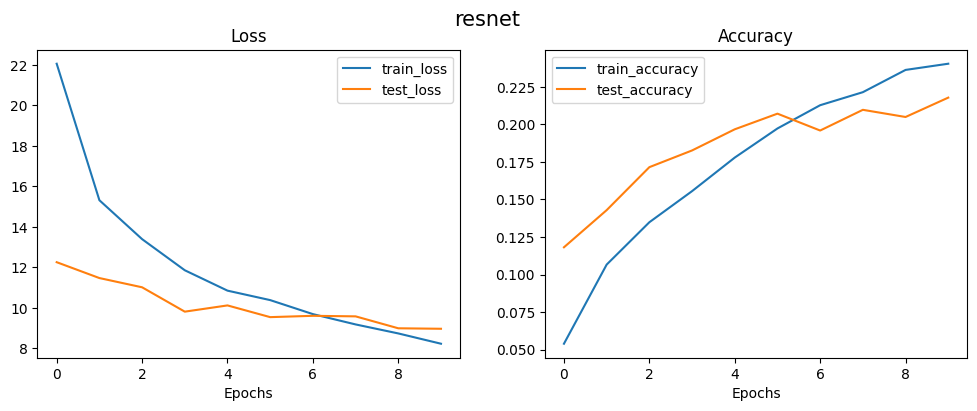

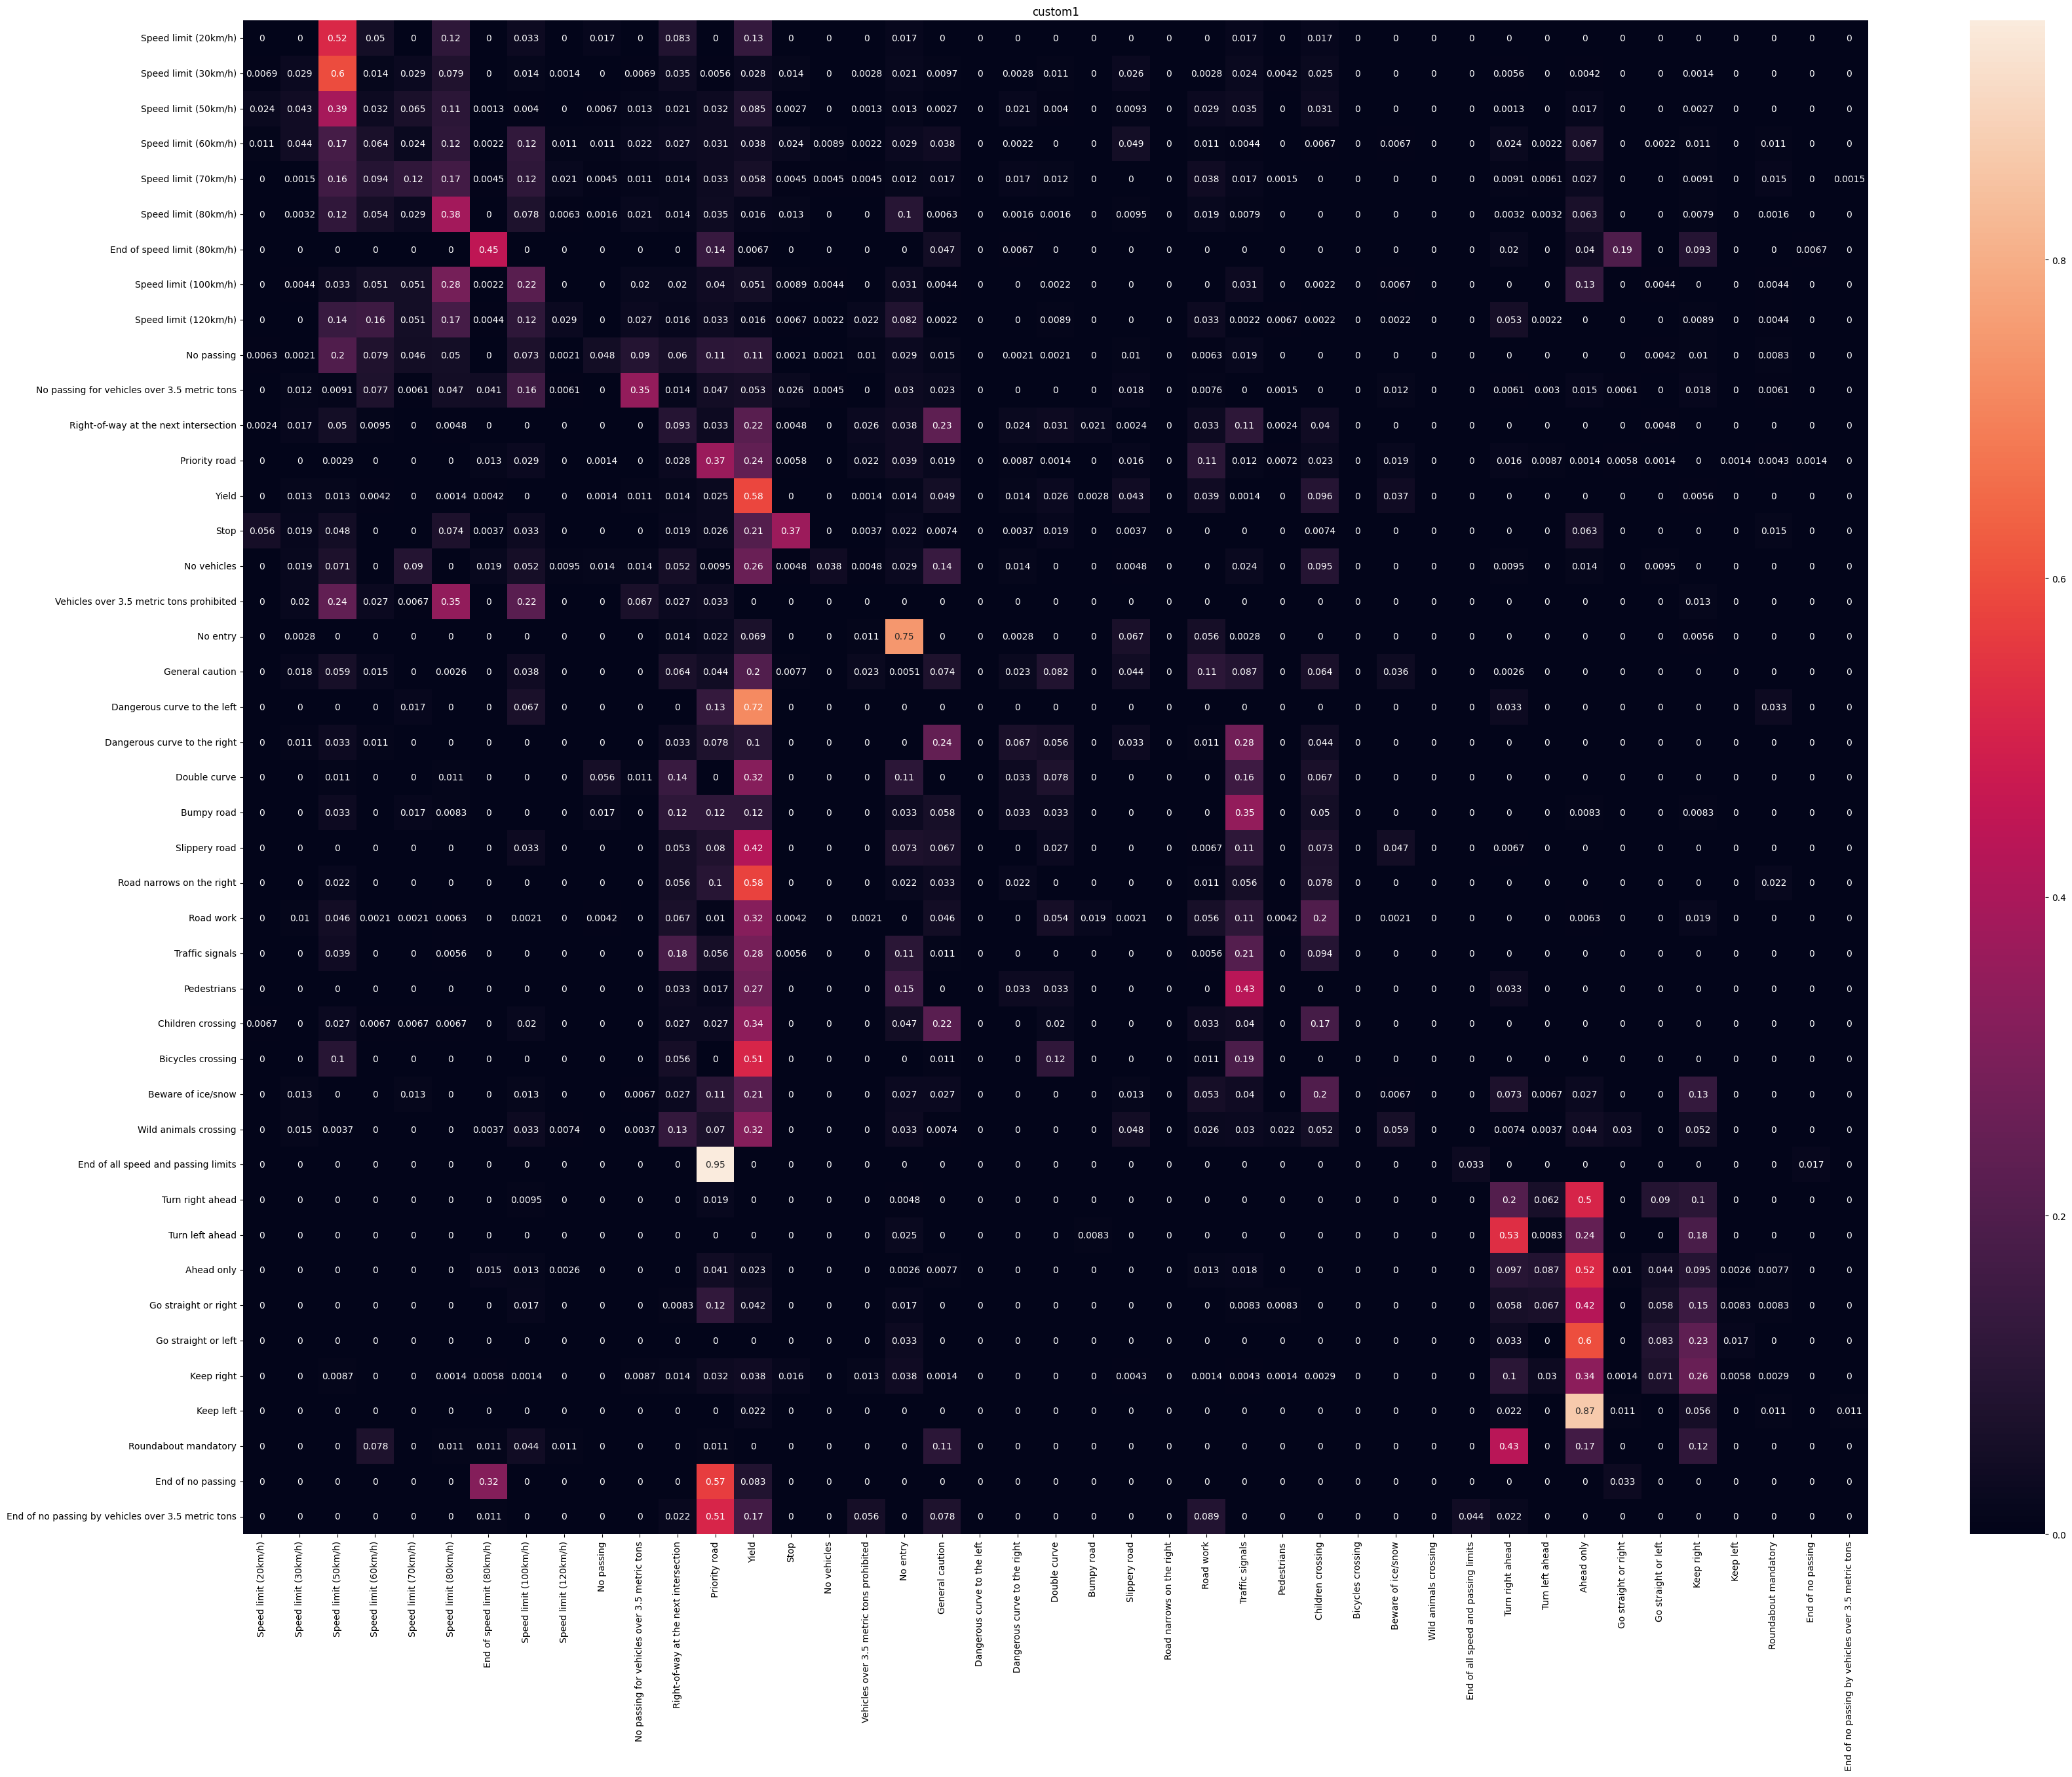

Accuracy = 0.2178270042194093, f1 score = 0.12268223063705436, precision = 0.15020501437816955, recall = 0.1406911705116963


In [ ]:

alexnet=torchvision.models.alexnet(pretrained=True).to(device)




for param in alexnet.parameters():
    param.requires_grad = False
alexnet.classifier[-1].requires_grad = True



torch.manual_seed(42)
torch.cuda.manual_seed(42)

alexnet.classifier[-1] = nn.Linear(4096, 43).to(device)






loss_fn = nn.CrossEntropyLoss()
optimizer =torch.optim.SGD(alexnet.classifier[-1].parameters(), lr=0.00001)



torch.manual_seed(42)
torch.cuda.manual_seed(42)
results_alexnet = train(model=alexnet,
                       train_dataloader=valid_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)


plot_loss_curves(results_alexnet, title="resnet")
acc, f1, precision, recall = calculate_performance(alexnet, test_dataloader, device, classes, "custom1")
                                          
print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")

# visual transformer model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 1 | train_loss: 3.0758 | train_acc: 0.1876 | test_loss: 3.5980 | test_acc: 0.1344


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 2 | train_loss: 2.3681 | train_acc: 0.3122 | test_loss: 3.4866 | test_acc: 0.1310


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 3 | train_loss: 2.1106 | train_acc: 0.3799 | test_loss: 3.7194 | test_acc: 0.1533


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 4 | train_loss: 1.9025 | train_acc: 0.4411 | test_loss: 3.7425 | test_acc: 0.1383


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 5 | train_loss: 1.6735 | train_acc: 0.5121 | test_loss: 3.6724 | test_acc: 0.1492


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 6 | train_loss: 1.5473 | train_acc: 0.5494 | test_loss: 3.6803 | test_acc: 0.1794


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 7 | train_loss: 1.4444 | train_acc: 0.5736 | test_loss: 3.7481 | test_acc: 0.1758


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 8 | train_loss: 1.4106 | train_acc: 0.5819 | test_loss: 3.8981 | test_acc: 0.1873


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 9 | train_loss: 1.2892 | train_acc: 0.6170 | test_loss: 3.7039 | test_acc: 0.1950


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

Epoch: 10 | train_loss: 1.2077 | train_acc: 0.6495 | test_loss: 3.9572 | test_acc: 0.1757


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

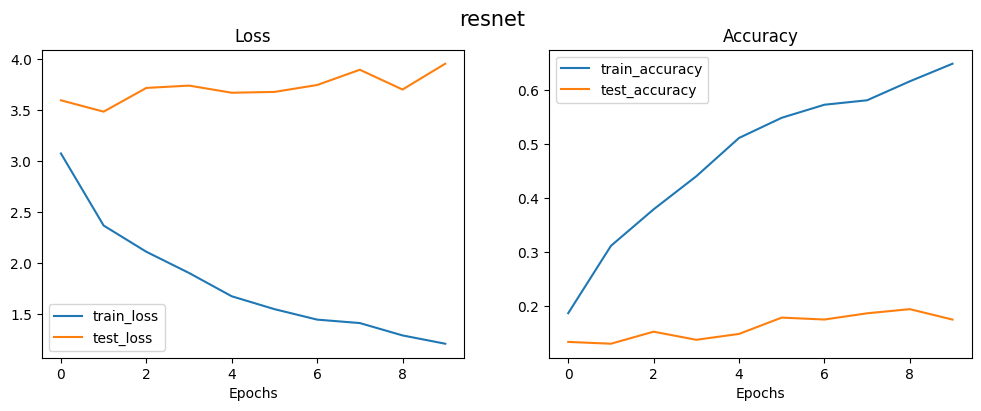

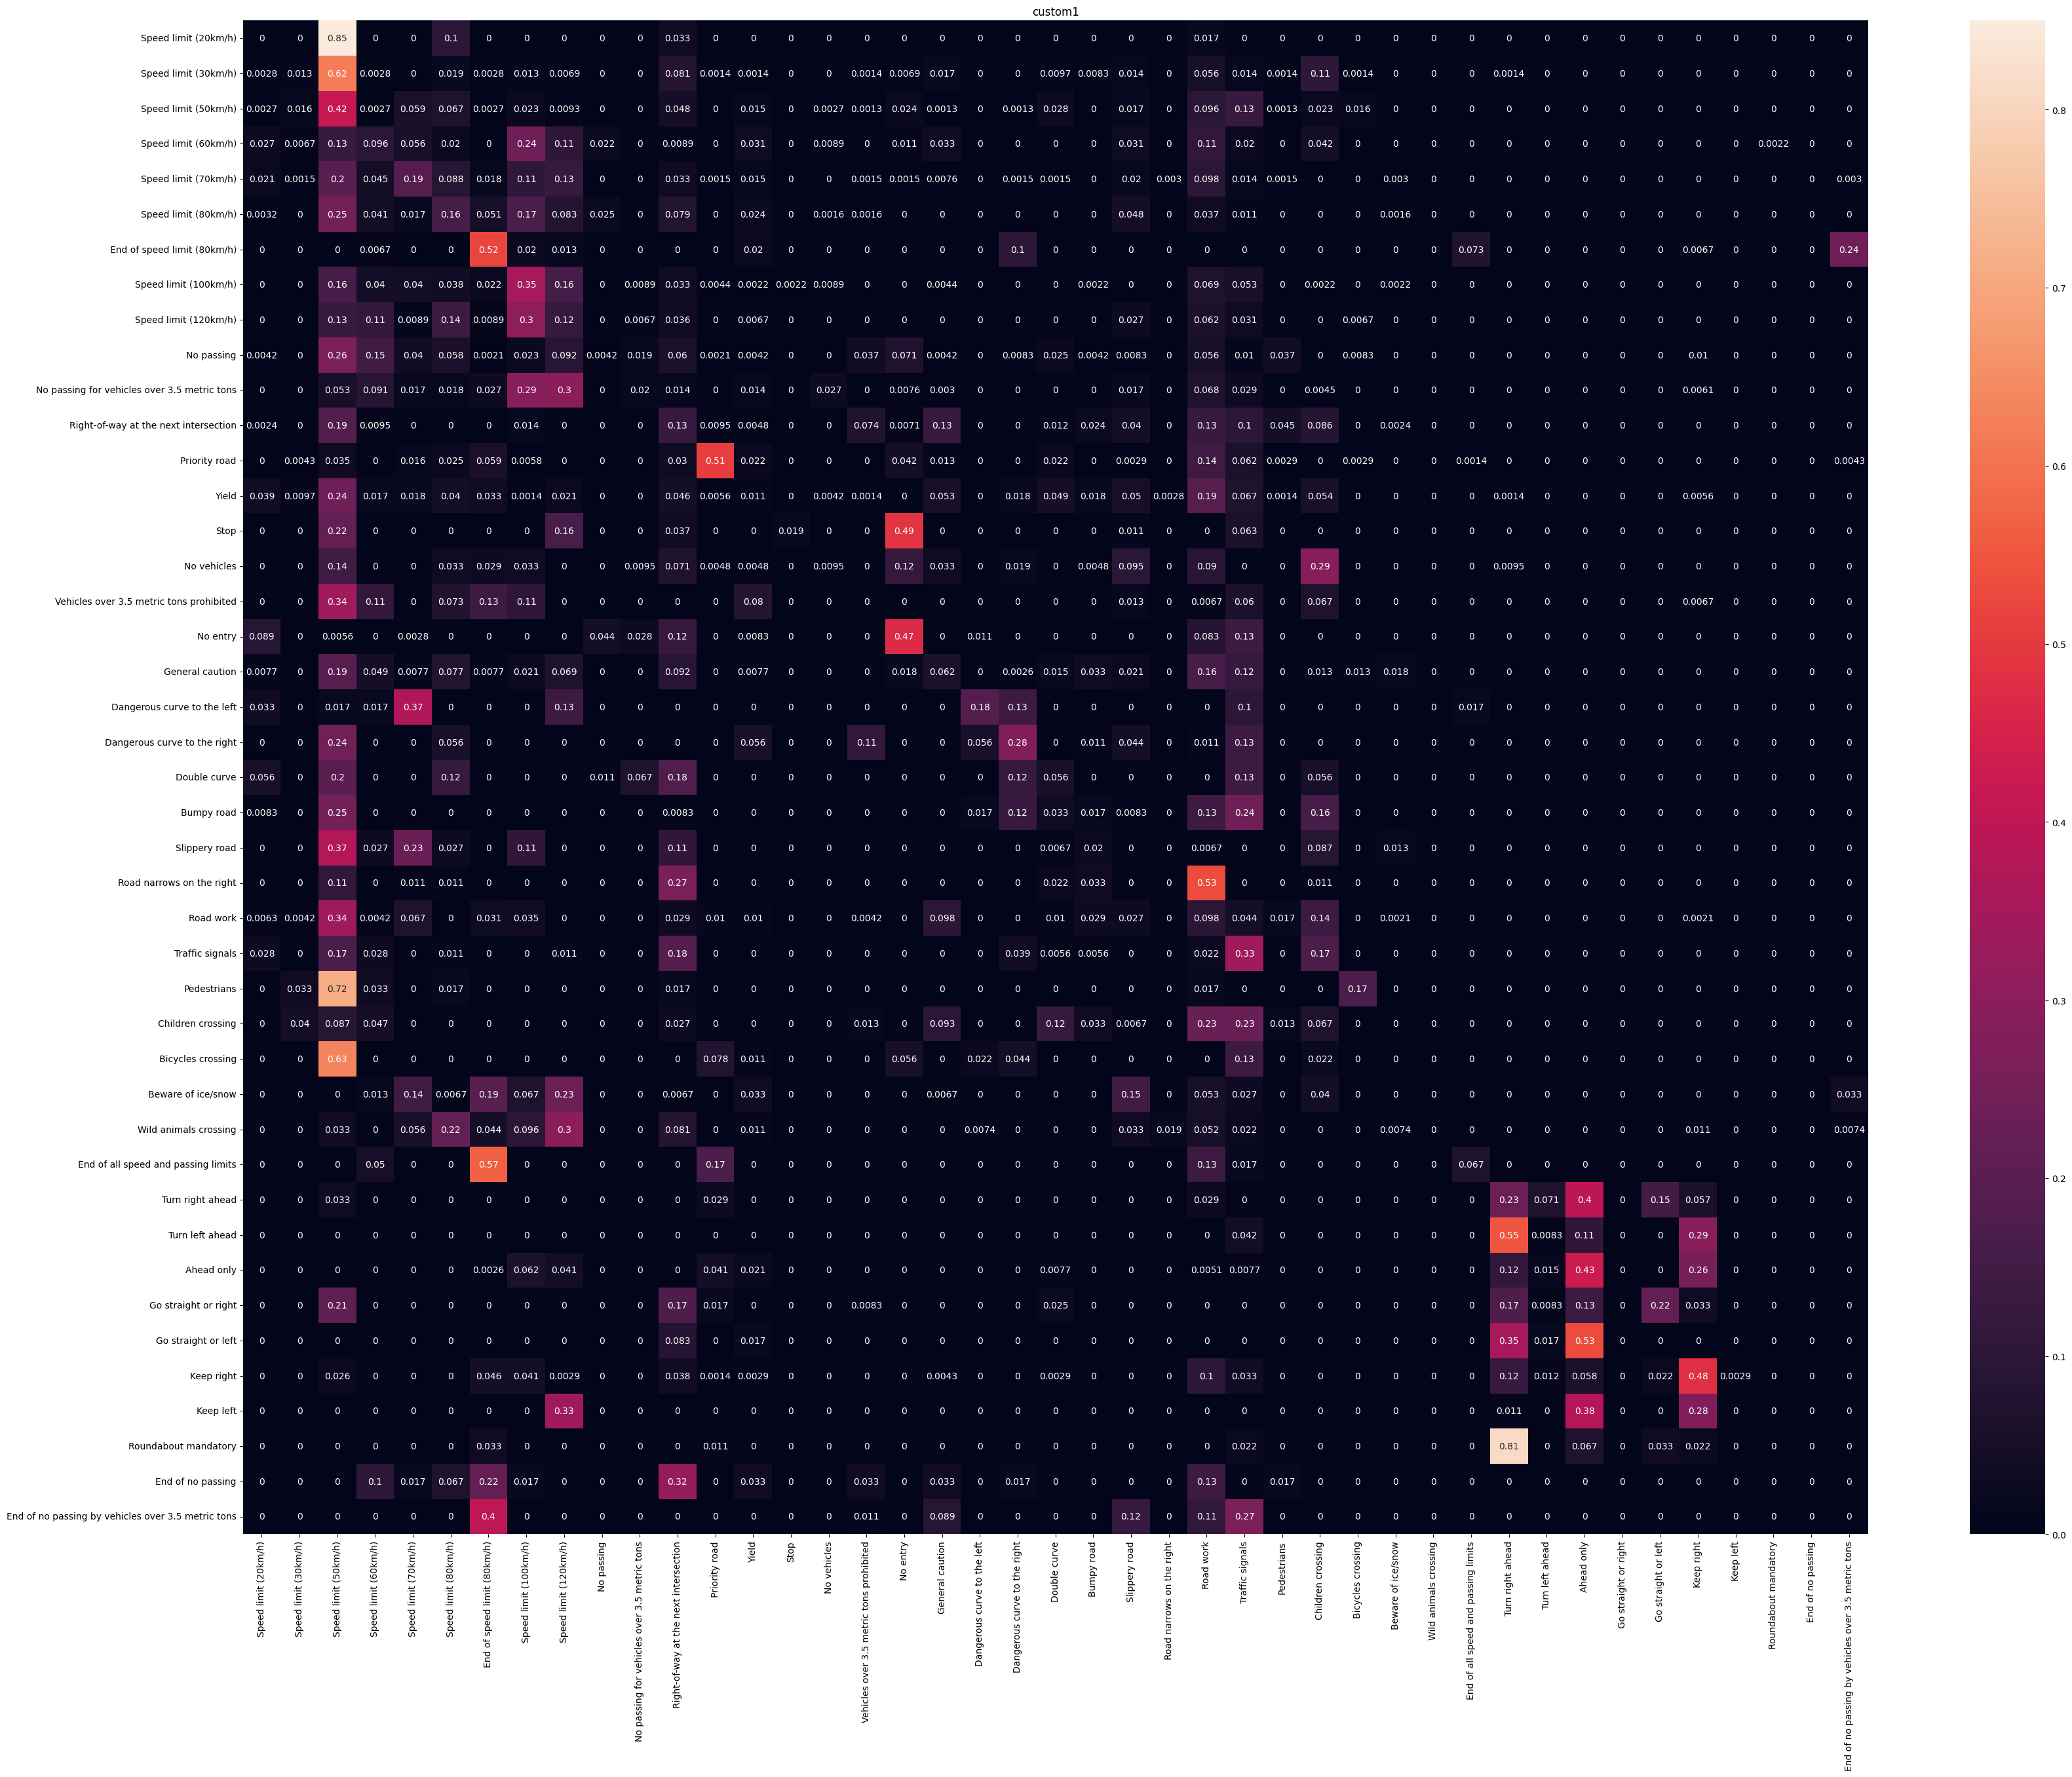

Accuracy = 0.17573839662447258, f1 score = 0.10958727516370277, precision = 0.14749030071421387, recall = 0.12415410535051587


In [ ]:

!pip install timm
import timm



transform = torchvision.transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataloader , valid_dataloader , test_dataloader=rgb_loader(x_train,y_train,x_valid,y_valid,x_test,y_test,transform=preprocess)



model_vit = timm.create_model('vit_base_patch16_224', pretrained=True).to(device)

for param in model_vit.parameters():
    param.requires_grad = False
model_vit.head.requires_grad = True

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_vit.head = nn.Linear(model_vit.head.in_features, 43).to(device)


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_vit.head.parameters(), lr=0.001)



torch.manual_seed(42)
torch.cuda.manual_seed(42)
results_vit = train(model=model_vit,
                    train_dataloader=valid_dataloader,
                    test_dataloader=test_dataloader,
                    optimizer=optimizer,
                    loss_fn=loss_fn,
                    epochs=10,
                    device=device)


plot_loss_curves(results_vit, title="resnet")
acc, f1, precision, recall = calculate_performance(model_vit, test_dataloader, device, classes, "custom1")
                                          
print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")


# effect of gray scale image 

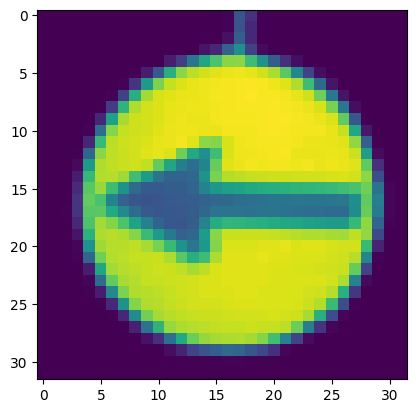

In [ ]:
# load data 


preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.ToTensor()
])
train_dataloader , valid_dataloader , test_dataloader=rgb_loader(x_train,y_train,x_valid,y_valid,x_test,y_test,transform=preprocess)





#visulize them with gray scale transform 
for batch_idx, (feature, labels) in enumerate(train_dataloader):
    break
plt.imshow(feature[5].permute(1, 2, 0).float()/224)
plt.show()

In [ ]:
#train diffrent model on rgb picture


torch.manual_seed(42)
torch.cuda.manual_seed(42)

simple_cnn = CustomCNN1(input_shape=1, output_shape=43).to(device)
#simple_cnn = CustomCNN2(input_shape=1, output_shape=43).to(device)
#simple_cnn = CustomCNN3(input_shape=1, output_shape=43).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=simple_cnn.parameters(), lr=0.0001)

results_simple_cnn = train(
    simple_cnn,
    valid_dataloader,
    test_dataloader,
   optimizer, 
    loss_fn,
    epochs=10,
    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.1820 | train_acc: 0.1450 | test_loss: 3.5033 | test_acc: 0.1346
Epoch: 2 | train_loss: 2.2719 | train_acc: 0.3954 | test_loss: 3.6245 | test_acc: 0.1941
Epoch: 3 | train_loss: 1.5510 | train_acc: 0.5778 | test_loss: 3.4465 | test_acc: 0.3028
Epoch: 4 | train_loss: 1.0144 | train_acc: 0.7418 | test_loss: 3.4010 | test_acc: 0.3395
Epoch: 5 | train_loss: 0.7132 | train_acc: 0.8225 | test_loss: 3.3106 | test_acc: 0.3986
Epoch: 6 | train_loss: 0.5366 | train_acc: 0.8702 | test_loss: 3.2976 | test_acc: 0.4333
Epoch: 7 | train_loss: 0.4003 | train_acc: 0.9165 | test_loss: 3.2653 | test_acc: 0.4589
Epoch: 8 | train_loss: 0.3072 | train_acc: 0.9320 | test_loss: 3.3462 | test_acc: 0.4818
Epoch: 9 | train_loss: 0.2486 | train_acc: 0.9506 | test_loss: 3.3728 | test_acc: 0.4826
Epoch: 10 | train_loss: 0.2071 | train_acc: 0.9594 | test_loss: 3.3722 | test_acc: 0.5034


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


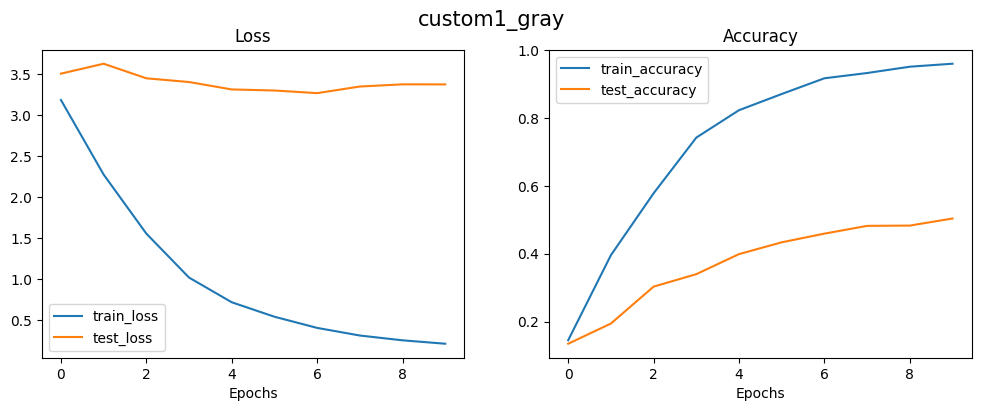

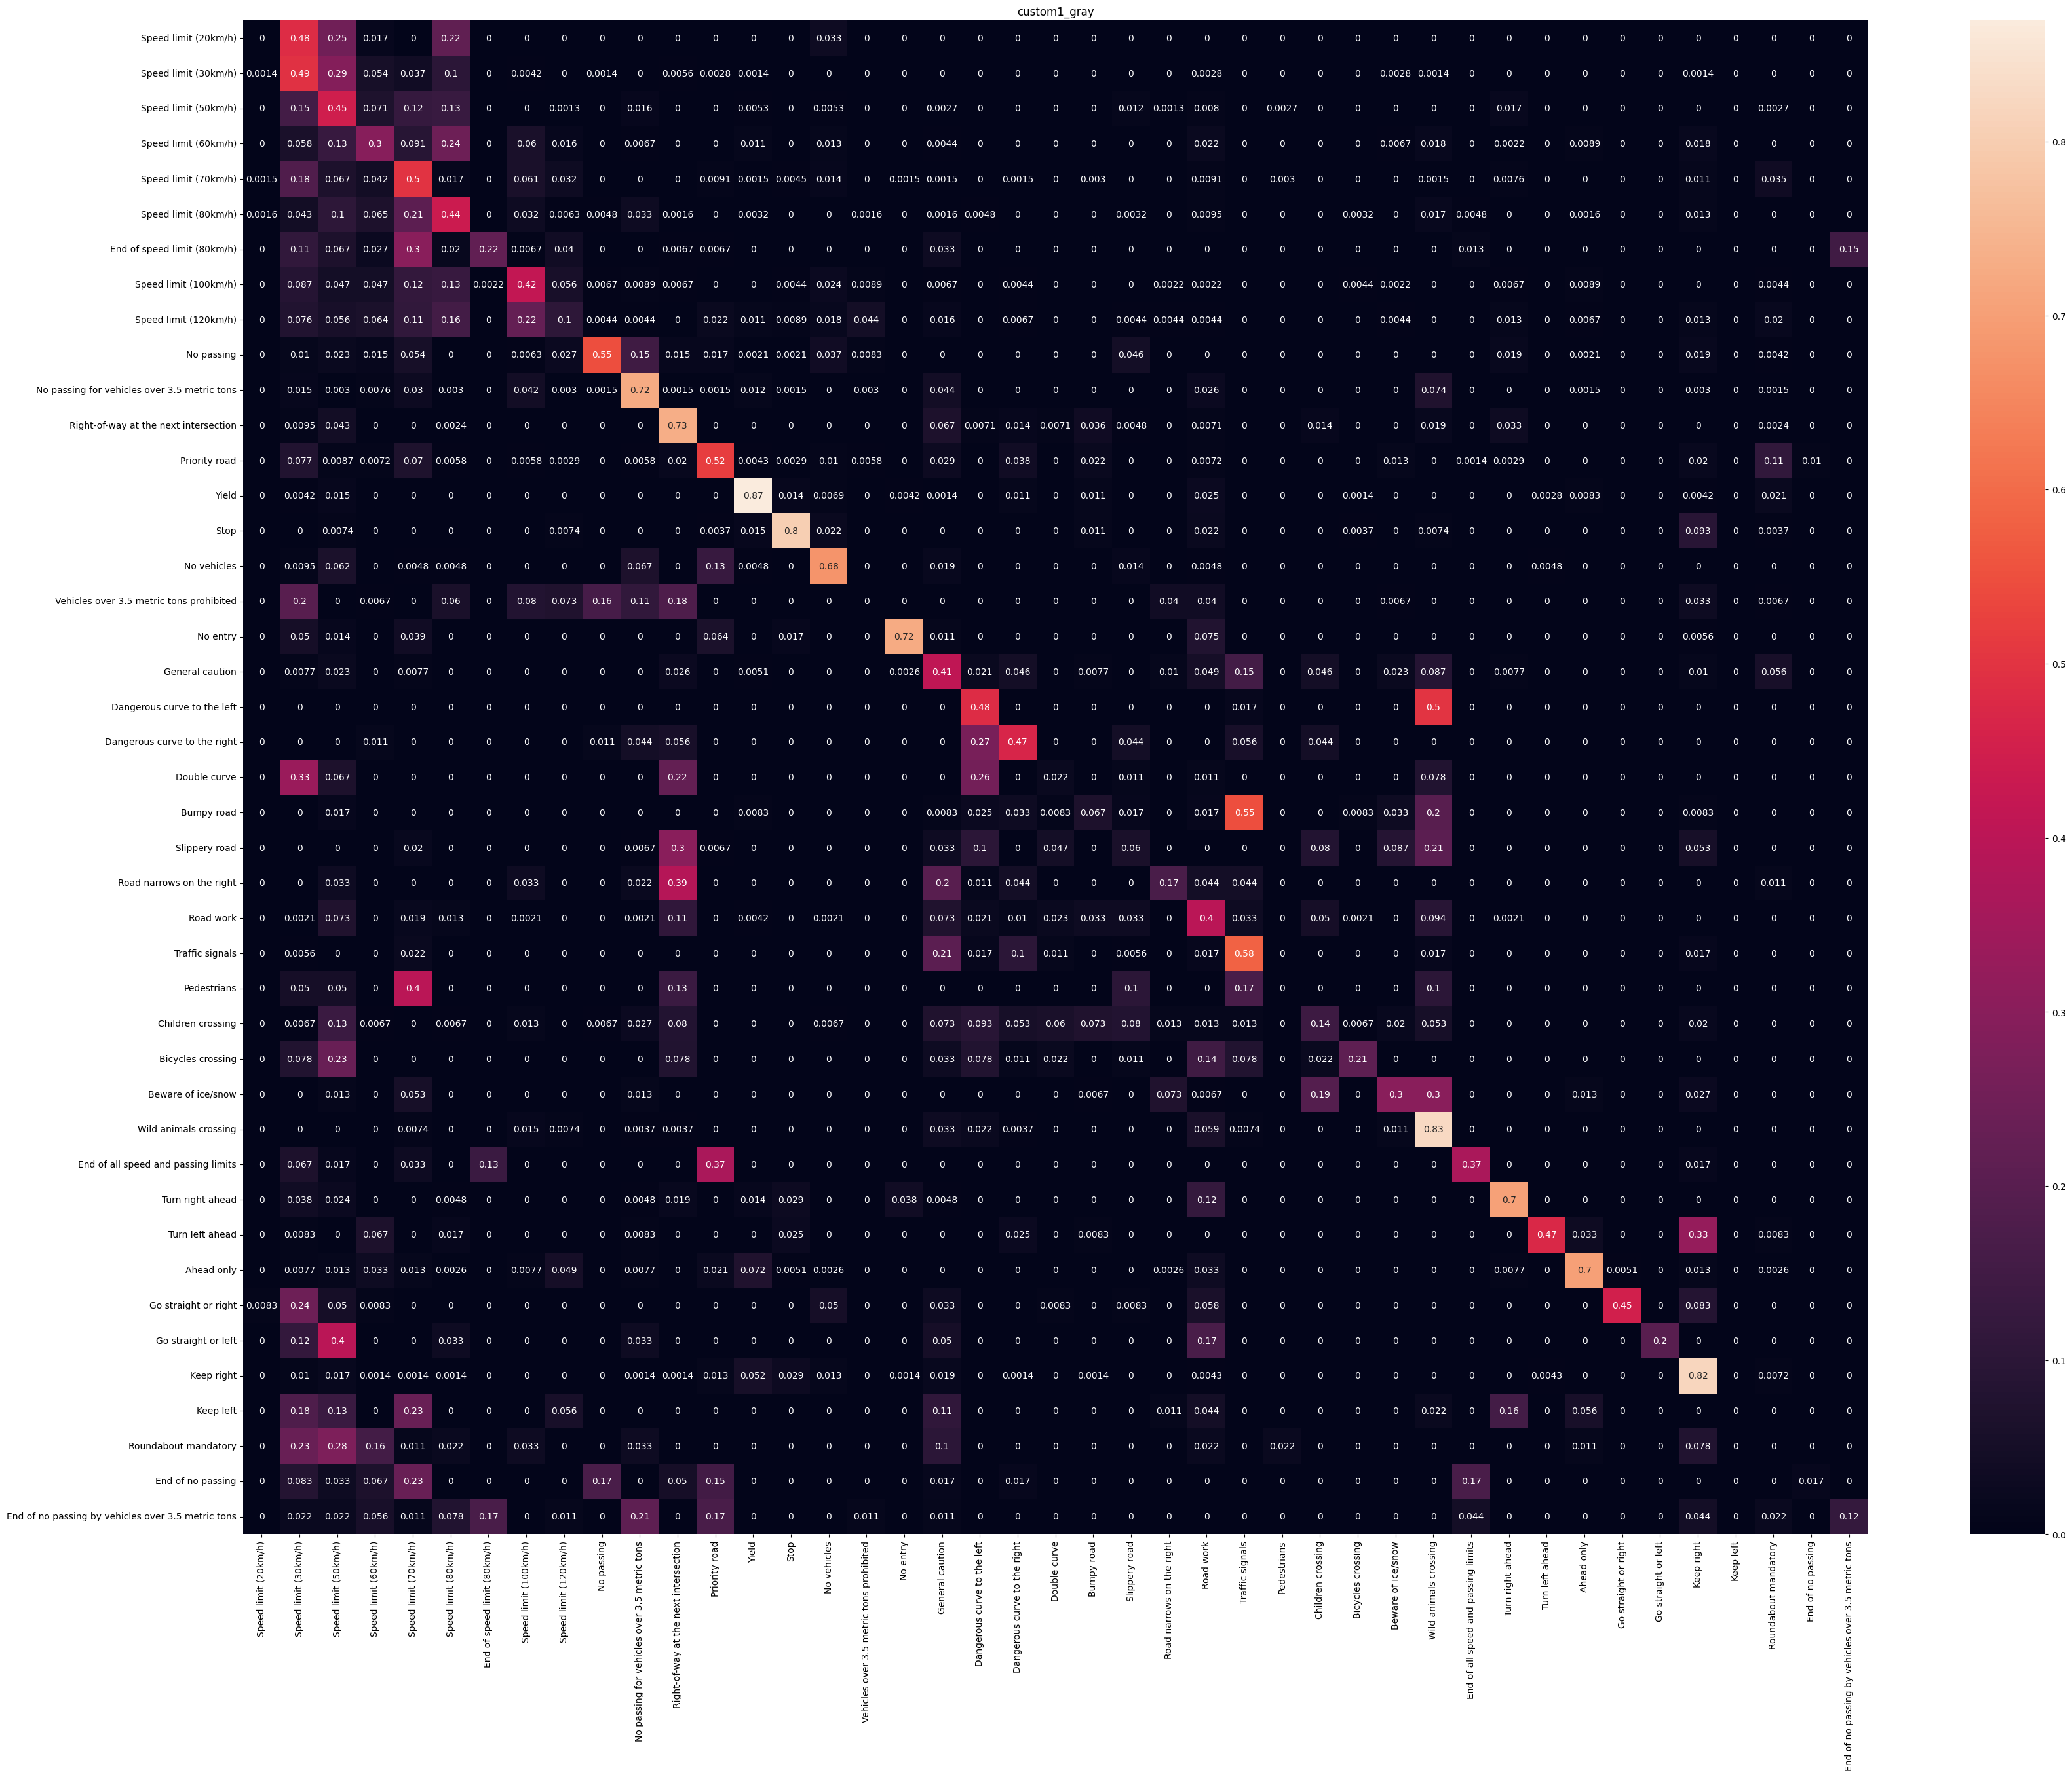

Accuracy = 0.5034090909090909, f1 score = 0.3876430538933631, precision = 0.44530202532448576, recall = 0.38368340026075115


In [ ]:
plot_loss_curves(results_simple_cnn, title="custom1_gray")
#plot_loss_curves(results_simple_cnn, title="custom2_gray")
#plot_loss_curves(results_simple_cnn, title="custom3_gray")


acc, f1, precision, recall = calculate_performance(simple_cnn, test_dataloader, device, classes, "custom1_gray")
#acc, f1, precision, recall = calculate_performance(simple_cnn, test_dataloader, device, classes, "custom2_gray")                                                  
#acc, f1, precision, recall = calculate_performance(simple_cnn, test_dataloader, device, classes, "custom3_gray")                                                 

print(f"Accuracy = {acc}, f1 score = {f1}, precision = {precision}, recall = {recall}")